In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import math

In [6]:
# Load main dataset
app_train = pd.read_csv('application_train_final_Without_Null_value.csv')
app_train.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DAYS_PAST_DUE_max,DAYS_PAST_DUE_mean,DAYS_PAST_DUE_sum,DAYS_PAST_DUE_count,NUM_LATE_PAYMENTS,DAYS_BEFORE_DUE_min,DAYS_BEFORE_DUE_max,DAYS_BEFORE_DUE_mean,DAYS_BEFORE_DUE_sum,DAYS_BEFORE_DUE_count
0,100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,...,0.0,0.000000,0.0,19.0,0.0,12.0,31.0,20.421053,388.0,19.0
1,100003,0,0,0,0,0,0,270000.0,1293502.5,35698.5,...,0.0,0.000000,0.0,25.0,0.0,1.0,14.0,7.160000,179.0,25.0
2,100004,0,1,1,1,1,0,67500.0,135000.0,6750.0,...,0.0,0.000000,0.0,3.0,0.0,3.0,11.0,7.666667,23.0,3.0
3,100006,0,0,0,0,1,0,135000.0,312682.5,29686.5,...,0.0,0.000000,0.0,16.0,0.0,1.0,77.0,19.375000,310.0,16.0
4,100007,0,0,1,0,1,0,121500.0,513000.0,21865.5,...,12.0,0.954545,63.0,66.0,16.0,0.0,31.0,4.590909,303.0,66.0


In [18]:
column_names = app_train.columns.tolist()
print(column_names)

['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELE

In [20]:
df = app_train[
    [
        'EXT_SOURCES_MEAN',
        'NAME_EDUCATION_TYPE',
        'CODE_GENDER',
        'CNT_DRAWINGS_ATM_CURRENT_mean',
        'FLAG_DOCUMENT_3',
        'NAME_CONTRACT_TYPE',
        'REGION_RATING_CLIENT_W_CITY',
        'CREDIT_TO_ANNUITY_RATIO',
        'DAYS_PAST_DUE_mean',
        'CNT_DRAWINGS_CURRENT_mean',
        'POS_COUNT',
        'DEF_30_CNT_SOCIAL_CIRCLE',
        'EMERGENCYSTATE_MODE',
        'OVERDUE_OVERALL',
        'BURO_ACTIVE',
        'DAYS_EMPLOYED',
        'NAME_INCOME_TYPE',
        'EXT_SOURCE_3',
        'DAYS_ENTRY_PAYMENT_min',
        'AMT_PAYMENT_sum',
        'EXT_SOURCES_SUM',
        'DAYS_INSTALMENT_min',
        'AMT_ANNUITY',
        'AMT_CREDIT',
        'REG_CITY_NOT_LIVE_CITY',
        'EXT_SOURCE_1_TO_AGE_RATIO',
        'OWN_CAR_AGE',
        'AMT_GOODS_PRICE',
        'CNT_DRAWINGS_CURRENT_max',
        'AMT_BALANCE_mean',
        'AMT_RECIVABLE_sum',
        'FLAG_CONT_MOBILE',
        'DEF_60_CNT_SOCIAL_CIRCLE',
        'DAYS_BIRTH',
        'AGE_YEARS',
        'AMT_INSTALMENT_max',
        'AMT_RECIVABLE_mean',
        'FLOORSMIN_MEDI',
        'NAME_FAMILY_STATUS',
        'FLOORSMAX_AVG',
        'HOUSETYPE_MODE',
        'EXT_SOURCE_2_TO_AGE_RATIO',
        'AMT_PAYMENT_max',
        'AMT_DRAWINGS_ATM_CURRENT_mean',
        'OVERDUE_DAYS_MAX',
        'AMT_RECEIVABLE_PRINCIPAL_mean',
        'DAYS_BEFORE_DUE_min',
        'AMT_RECIVABLE_max',
        'AMT_INSTALMENT_sum',
        'DAYS_ENTRY_PAYMENT_mean',
        'TARGET'
    ]
]

df.head(5)

,EXT_SOURCES_MEAN,NAME_EDUCATION_TYPE,CODE_GENDER,CNT_DRAWINGS_ATM_CURRENT_mean,FLAG_DOCUMENT_3,NAME_CONTRACT_TYPE,REGION_RATING_CLIENT_W_CITY,CREDIT_TO_ANNUITY_RATIO,DAYS_PAST_DUE_mean,CNT_DRAWINGS_CURRENT_mean,...,EXT_SOURCE_2_TO_AGE_RATIO,AMT_PAYMENT_max,AMT_DRAWINGS_ATM_CURRENT_mean,OVERDUE_DAYS_MAX,AMT_RECEIVABLE_PRINCIPAL_mean,DAYS_BEFORE_DUE_min,AMT_RECIVABLE_max,AMT_INSTALMENT_sum,DAYS_ENTRY_PAYMENT_mean,TARGET
0,0.161787,4,1,0.0,1,0,2,16.461104,0.000000,0.0,...,0.010518,53093.745,0.0,3.0,0.0,12.0,0.0,219625.695,-315.421053,1
1,0.466757,1,0,0.0,1,0,1,36.234085,0.000000,0.0,...,0.013828,560835.360,0.0,3.0,0.0,1.0,0.0,1618864.650,-1385.320000,0
2,0.642739,4,1,0.0,0,1,2,20.000000,0.000000,0.0,...,0.010691,10573.965,0.0,2.0,0.0,3.0,0.0,21288.465,-761.666667,0
3,0.650442,4,0,0.0,1,0,2,10.532818,0.000000,0.0,...,0.012508,691786.890,0.0,0.0,0.0,1.0,0.0,1007153.415,-271.625000,0
4,0.322738,4,1,0.0,0,0,2,23.461618,0.954545,0.0,...,0.005977,22678.785,0.0,1.0,0.0,0.0,0.0,835985.340,-1032.242424,0


In [26]:
df.shape

(307511, 51)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 51 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   EXT_SOURCES_MEAN               307511 non-null  float64
 1   NAME_EDUCATION_TYPE            307511 non-null  int64  
 2   CODE_GENDER                    307511 non-null  int64  
 3   CNT_DRAWINGS_ATM_CURRENT_mean  307511 non-null  float64
 4   FLAG_DOCUMENT_3                307511 non-null  int64  
 5   NAME_CONTRACT_TYPE             307511 non-null  int64  
 6   REGION_RATING_CLIENT_W_CITY    307511 non-null  int64  
 7   CREDIT_TO_ANNUITY_RATIO        307511 non-null  float64
 8   DAYS_PAST_DUE_mean             307511 non-null  float64
 9   CNT_DRAWINGS_CURRENT_mean      307511 non-null  float64
 10  POS_COUNT                      307511 non-null  float64
 11  DEF_30_CNT_SOCIAL_CIRCLE       307511 non-null  float64
 12  EMERGENCYSTATE_MODE           

In [28]:
df.describe()

,EXT_SOURCES_MEAN,NAME_EDUCATION_TYPE,CODE_GENDER,CNT_DRAWINGS_ATM_CURRENT_mean,FLAG_DOCUMENT_3,NAME_CONTRACT_TYPE,REGION_RATING_CLIENT_W_CITY,CREDIT_TO_ANNUITY_RATIO,DAYS_PAST_DUE_mean,CNT_DRAWINGS_CURRENT_mean,...,EXT_SOURCE_2_TO_AGE_RATIO,AMT_PAYMENT_max,AMT_DRAWINGS_ATM_CURRENT_mean,OVERDUE_DAYS_MAX,AMT_RECEIVABLE_PRINCIPAL_mean,DAYS_BEFORE_DUE_min,AMT_RECIVABLE_max,AMT_INSTALMENT_sum,DAYS_ENTRY_PAYMENT_mean,TARGET
count,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,...,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307511.000000,307511.000000
mean,0.508966,3.188273,0.341669,0.112581,0.710023,0.095213,2.031521,21.612259,1.010508,0.435682,...,0.012663,1.310453e+05,2443.839657,2.803509,19428.994104,2.032812,4.054618e+04,6.377183e+05,-873.414330,0.080729
std,0.150243,1.298753,0.474297,0.452971,0.453752,0.293509,0.502737,7.823677,8.867959,2.082412,...,0.005892,2.432363e+05,10880.312114,3.167610,63971.313103,4.315751,1.118124e+05,8.698961e+05,616.088153,0.272419
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,8.036674,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,-2930.232558,0.000000,0.000000e+00,0.000000e+00,-3071.000000,0.000000
25%,0.413409,2.000000,0.000000,0.000000,0.000000,0.000000,2.000000,15.614555,0.000000,0.000000,...,0.008872,1.225825e+04,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.147045e+05,-1281.587121,0.000000
50%,0.524386,4.000000,0.000000,0.000000,1.000000,0.000000,2.000000,20.000000,0.012579,0.000000,...,0.012381,3.185433e+04,0.000000,2.000000,0.000000,0.000000,0.000000e+00,2.980917e+05,-763.071429,0.000000
75%,0.622757,4.000000,1.000000,0.000000,1.000000,0.000000,2.000000,27.099985,0.467742,0.000000,...,0.016339,1.219110e+05,0.000000,4.000000,0.000000,2.000000,0.000000e+00,7.964169e+05,-377.292892,0.000000
max,0.878903,4.000000,2.000000,35.000000,1.000000,1.000000,3.000000,45.305079,1885.386364,118.250000,...,0.037768,3.771488e+06,904500.000000,99.000000,884547.880714,156.000000,1.354829e+06,2.327473e+07,0.000000,1.000000


In [56]:
# Get unique value counts
unique_counts = {col: df[col].nunique() for col in df.columns}

# Convert to DataFrame and sort
unique_df = pd.DataFrame.from_dict(unique_counts, orient='index', columns=['Unique_Count'])
unique_df = unique_df.sort_values(by='Unique_Count', ascending=True)

# Optional: reset index for cleaner display
unique_df = unique_df.reset_index().rename(columns={'index': 'Column'})

print(unique_df)

                           Column  Unique_Count
0                          TARGET             2
1                 FLAG_DOCUMENT_3             2
2              NAME_CONTRACT_TYPE             2
3                FLAG_CONT_MOBILE             2
4          REG_CITY_NOT_LIVE_CITY             2
5                     CODE_GENDER             3
6     REGION_RATING_CLIENT_W_CITY             3
7             EMERGENCYSTATE_MODE             3
8                  HOUSETYPE_MODE             4
9             NAME_EDUCATION_TYPE             5
10             NAME_FAMILY_STATUS             6
11               NAME_INCOME_TYPE             8
12       DEF_60_CNT_SOCIAL_CIRCLE             9
13       DEF_30_CNT_SOCIAL_CIRCLE            10
14                    BURO_ACTIVE            23
15                      POS_COUNT            26
16            DAYS_BEFORE_DUE_min            43
17                 FLOORSMIN_MEDI            47
18                      AGE_YEARS            50
19               OVERDUE_DAYS_MAX       

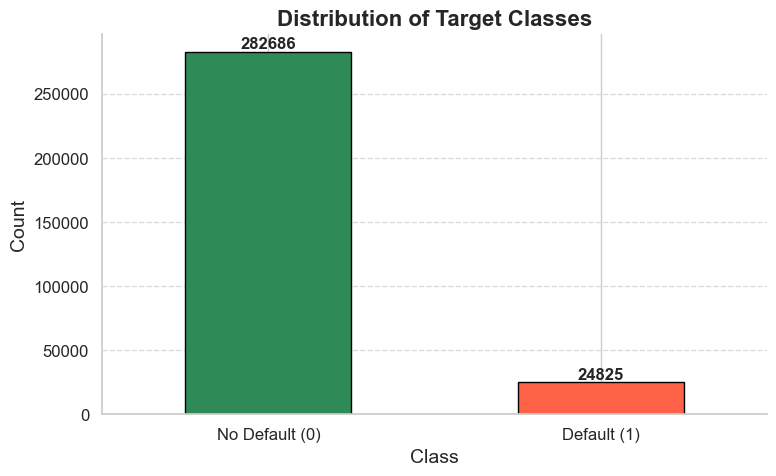

In [130]:
# Set a vibrant style
sns.set(style='whitegrid', font_scale=1.2)

# Define custom colors for each class
colors = ['#2E8B57', '#FF6347']  # Green for No Default, Red for Default
class_labels = ['No Default (0)', 'Default (1)']

# Get sorted value counts
target_counts = df['TARGET'].value_counts().sort_index()

# Create the plot
plt.figure(figsize=(8, 5))
target_counts.plot(
    kind='bar',
    color=colors,
    edgecolor='black'
)

# Customize aesthetics
plt.title('Distribution of Target Classes', fontsize=16, weight='bold')
plt.xlabel('Class', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(ticks=range(len(class_labels)), labels=class_labels, rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars with counts
for i, count in enumerate(target_counts):
    plt.text(i, count + 100, str(count), ha='center', va='bottom', fontsize=12, fontweight='bold')

sns.despine()
plt.tight_layout()
plt.savefig("Distribution of target Classes.png", dpi=300)  # Save as high-res image
plt.show()
plt.close()

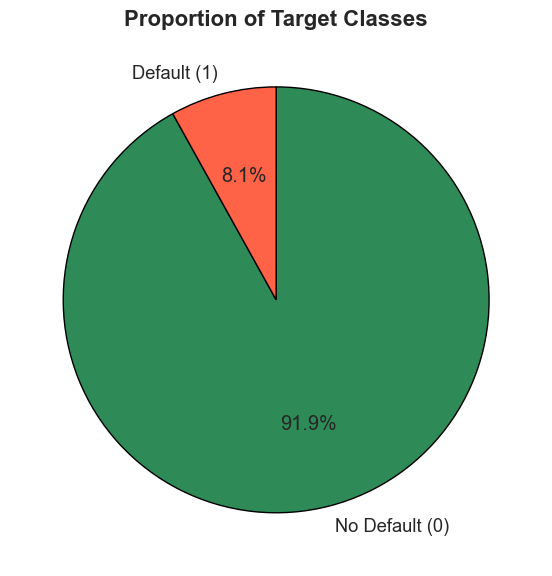

In [132]:
# Define colors and labels
colors = ['#2E8B57', '#FF6347']  # Green for class 0, Red for class 1
labels = ['No Default (0)', 'Default (1)']

# Get value counts
target_counts = df['TARGET'].value_counts().sort_index()

# Create pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    target_counts,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',
    startangle=90,
    counterclock=False,
    wedgeprops={'edgecolor': 'black', 'linewidth': 1}
)

# Add title and styling
plt.title('Proportion of Target Classes', fontsize=16, weight='bold')
plt.tight_layout()
plt.savefig("Pie Chart.png", dpi=300)  # Save as high-res image
plt.show()
plt.close()

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style='whitegrid', font_scale=1.1)

# Compute full correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Create custom diverging palette from green to red
cmap = sns.diverging_palette(130, 10, as_cmap=True)  # 130 = green, 10 = red

# Plot heatmap
plt.figure(figsize=(30, 24))  # Large canvas
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap=cmap,
    center=0,
    linewidths=0.5,
    linecolor='black',
    cbar_kws={'shrink': 0.8}
)
plt.title('Full Correlation Heatmap', fontsize=20, weight='bold')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig("full_heatmap.png", dpi=300)  # Save as high-res image
plt.close()

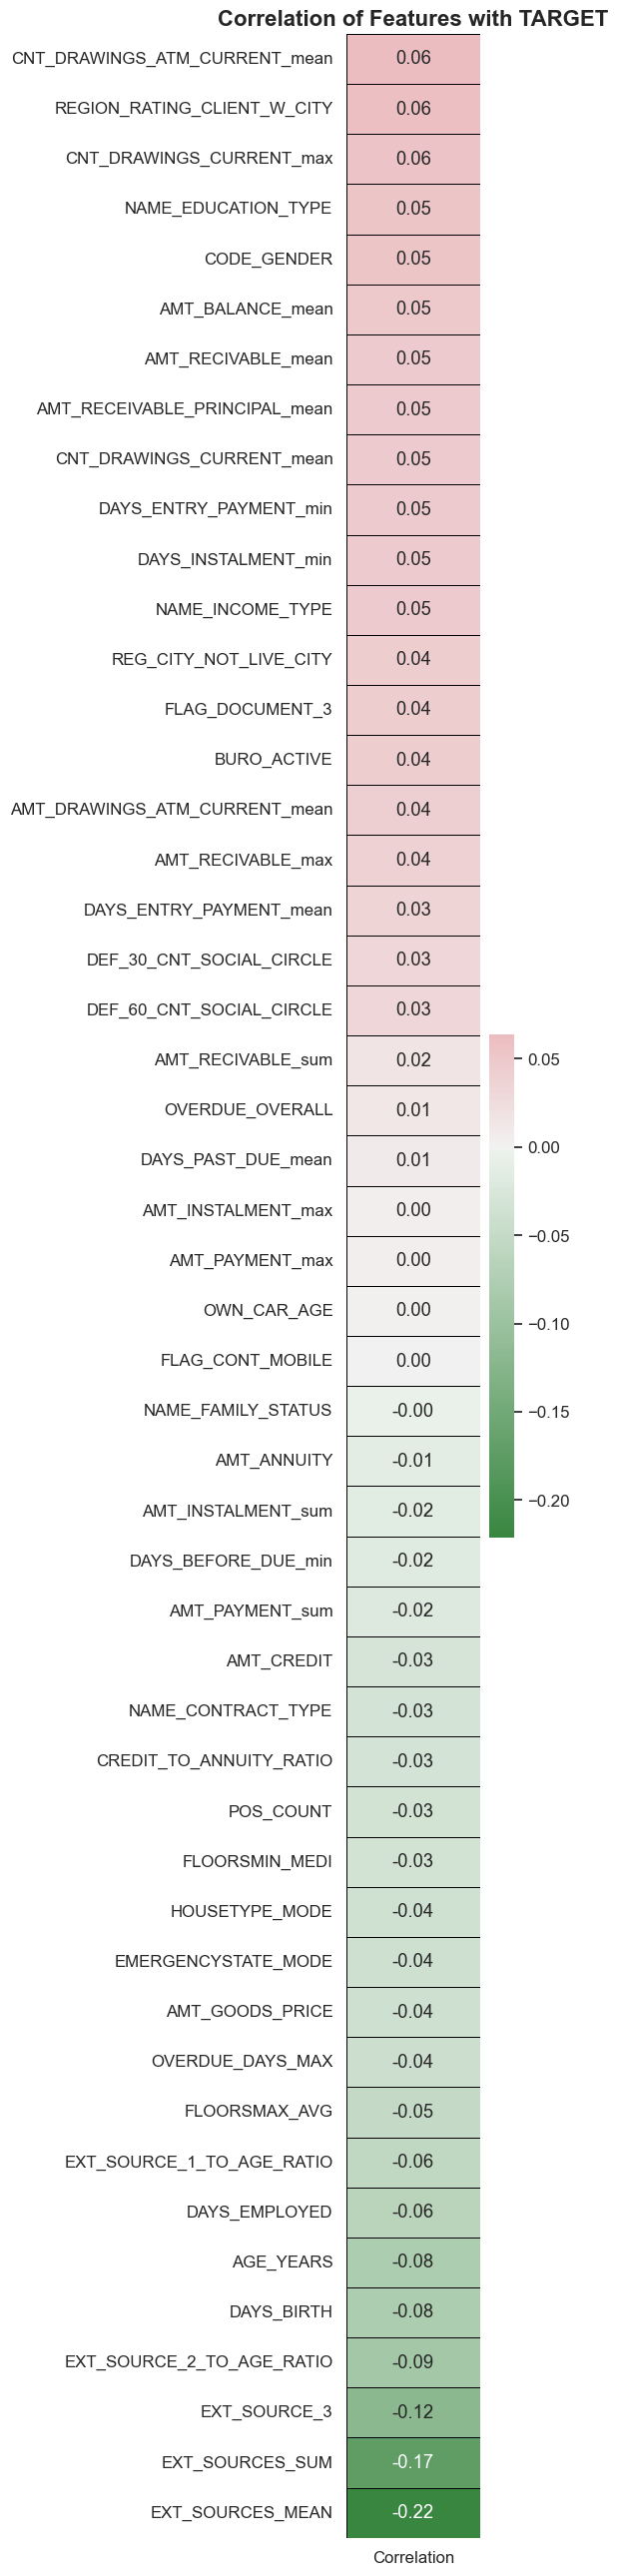

In [152]:
# Set style
sns.set(style='whitegrid', font_scale=1.1)

# Compute correlations with respect to TARGET
corr_with_target = df.corr(numeric_only=True)['TARGET'].drop('TARGET').sort_values(ascending=False)

# Convert to DataFrame for heatmap
corr_df = corr_with_target.to_frame(name='Correlation')

# Create custom diverging palette (Green to Red)
cmap = sns.diverging_palette(130, 10, as_cmap=True)

# Plot heatmap vertically
plt.figure(figsize=(6, len(corr_df) * 0.5 + 1))  # Dynamic height based on number of features
sns.heatmap(
    corr_df,
    annot=True,
    cmap=cmap,
    center=0,
    cbar=True,
    linewidths=0.5,
    linecolor='black',
    fmt=".2f"
)

# Aesthetics
plt.title('Correlation of Features with TARGET', fontsize=16, weight='bold')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig("Correlation with target.png", dpi=300)  # Save as high-res image
plt.show()
plt.close()

C:\Users\tarun\AppData\Local\Temp\ipykernel_20916\3279927442.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Default_Status'] = df['TARGET'].map({0: 'Non-Default', 1: 'Default'})
C:\Users\tarun\AppData\Local\Temp\ipykernel_20916\3279927442.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\tarun\AppData\Local\Temp\ipykernel_20916\3279927442.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\tarun\AppData\Local\Temp\ipy

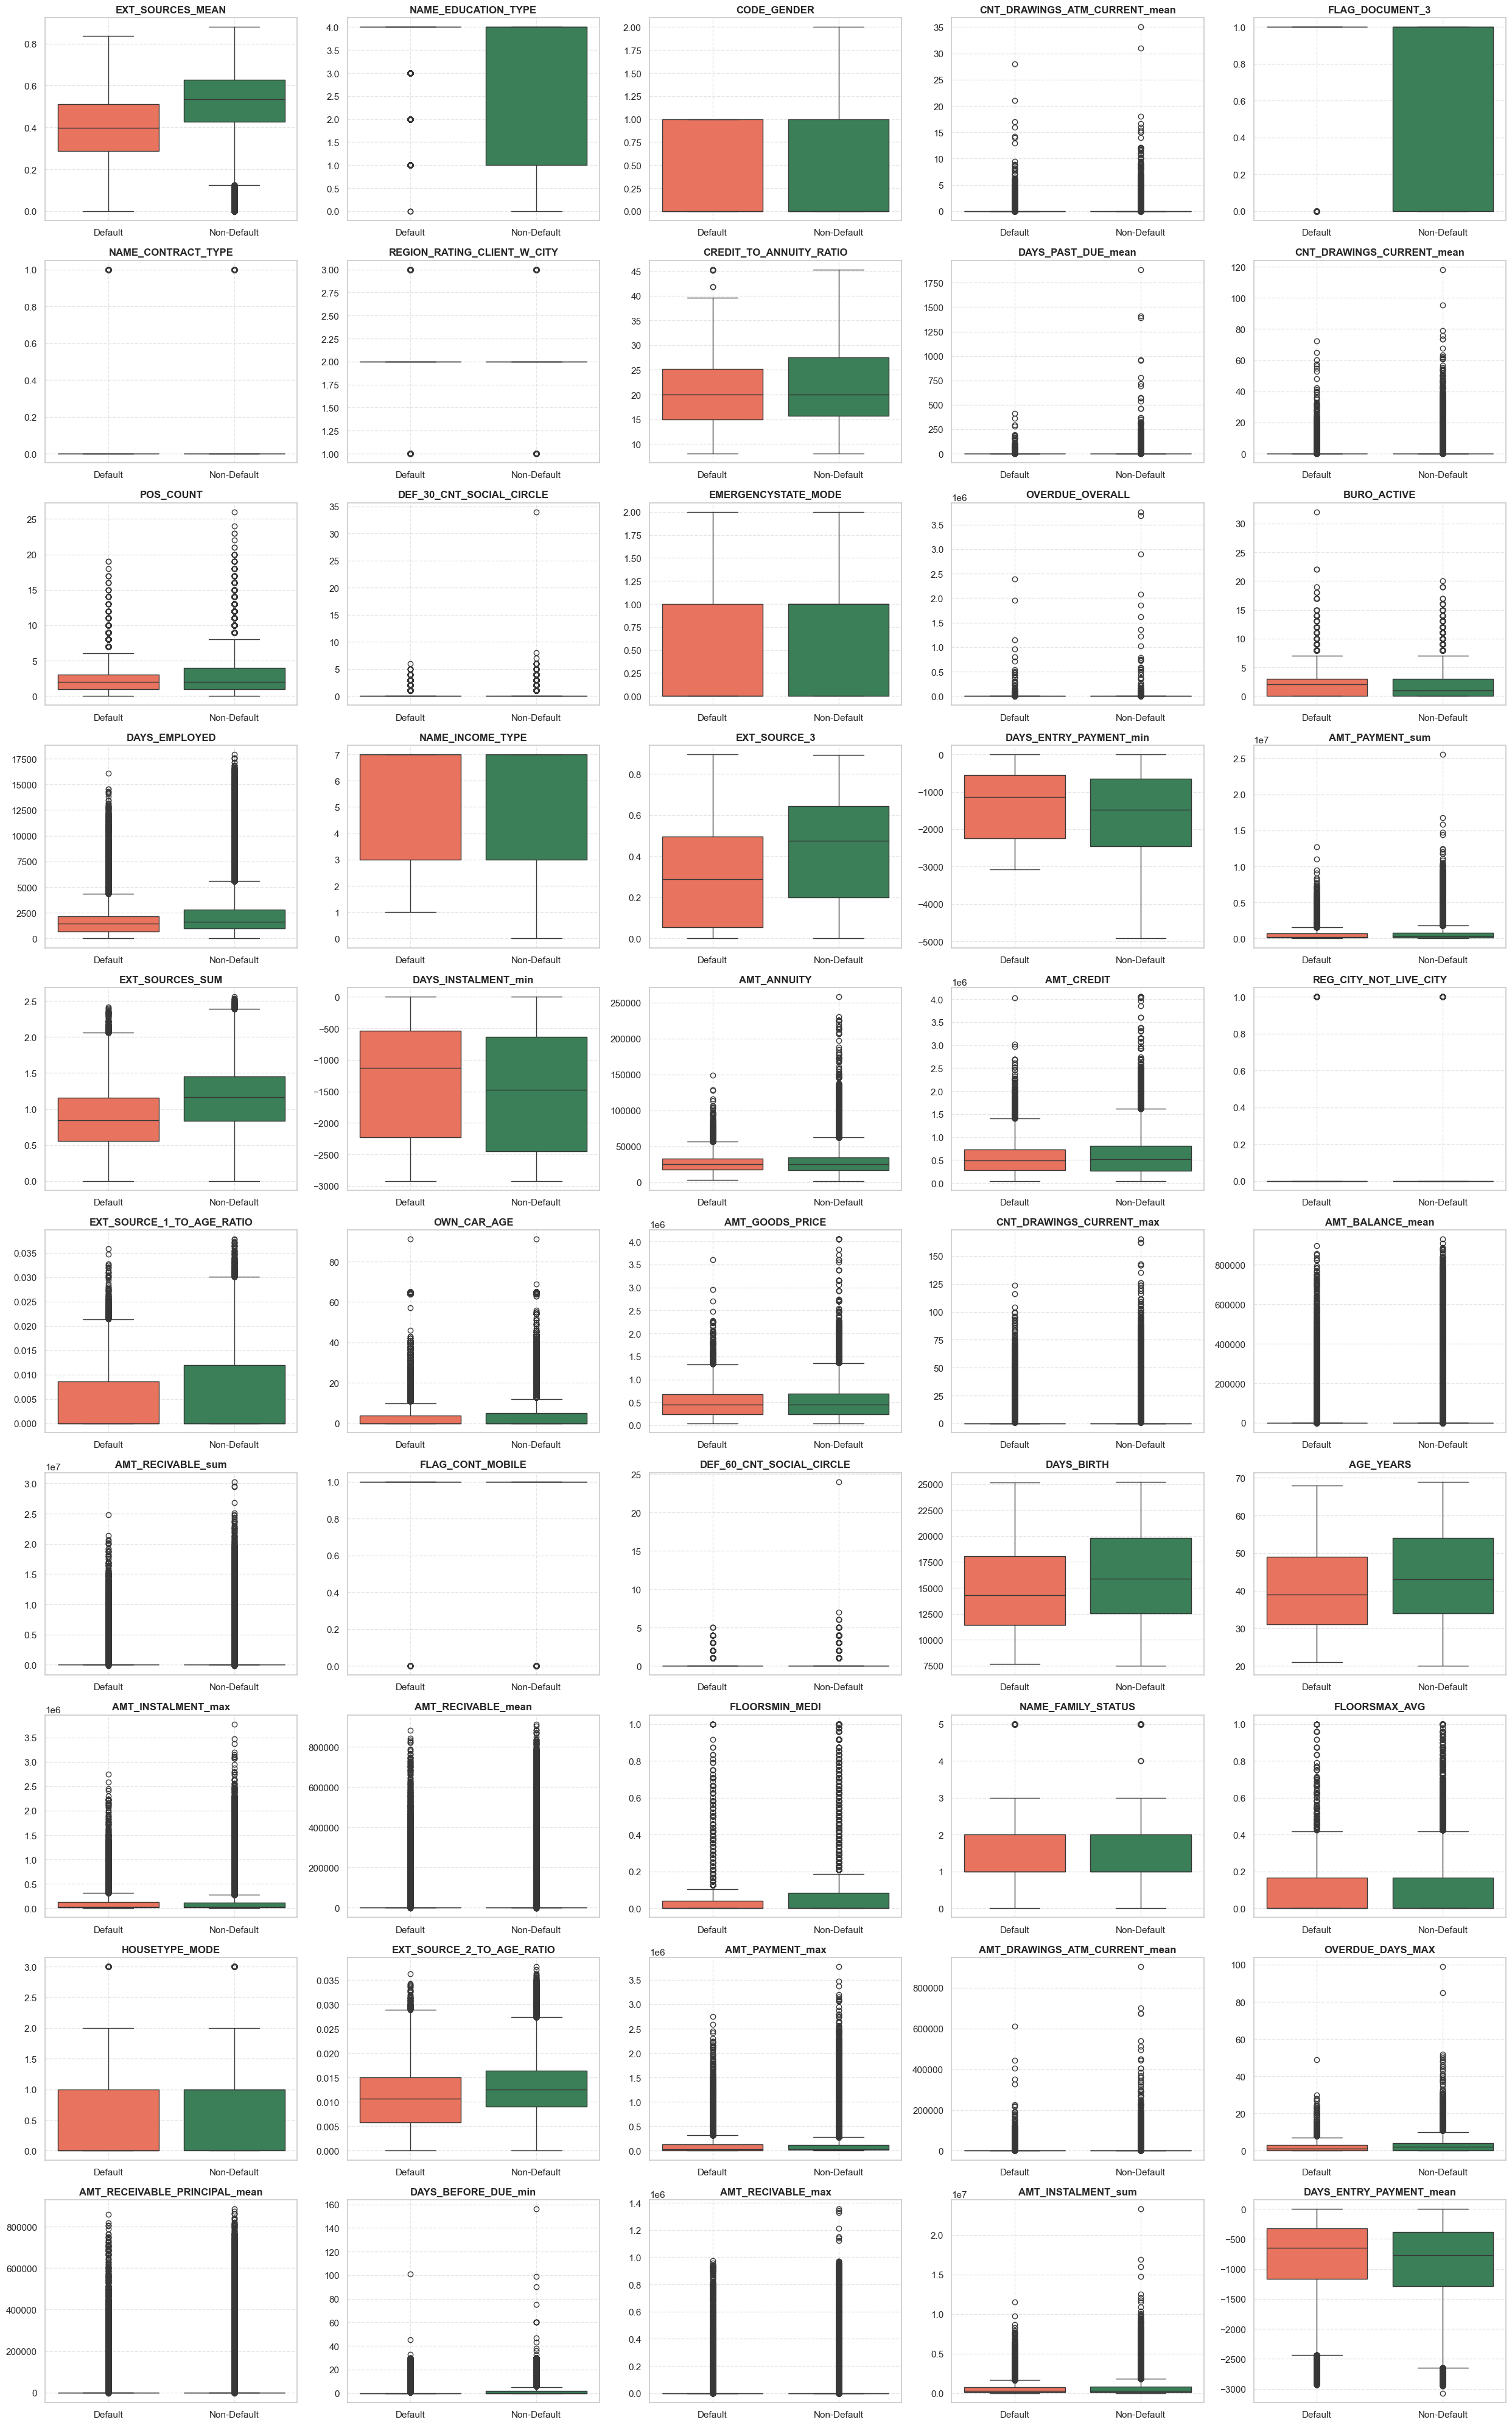

In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Map TARGET to readable labels
df['Default_Status'] = df['TARGET'].map({0: 'Non-Default', 1: 'Default'})

# Select numerical columns (excluding TARGET itself)
numerical_cols = df.select_dtypes(include='number').columns.drop('TARGET')

# Limit to first 50 features (5 columns × 10 rows)
selected_cols = numerical_cols[:50]

# Set plot style
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(nrows=10, ncols=5, figsize=(25, 40))
axes = axes.flatten()

# Define fixed color palette
palette = {'Non-Default': '#2E8B57', 'Default': '#FF6347'}

# Loop through each column and plot
for i, col in enumerate(selected_cols):
    sns.boxplot(
        x='Default_Status',
        y=col,
        data=df,
        palette=palette,
        ax=axes[i]
    )
    axes[i].set_title(f'{col}', fontsize=12, weight='bold')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].grid(True, linestyle='--', alpha=0.5)

# Hide unused axes if fewer than 50 columns
for j in range(len(selected_cols), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.savefig("Bar plot.png", dpi=300)  # Save as high-res image
plt.show()
plt.close()

In [84]:
##OUTLIER TREATMENT SIRKANT BRO PLEASE REVIEW
def log_outlier_counts(df, column, category_col='TARGET'):
    outlier_log = {}
    for cat in df[category_col].unique():
        subset = df[df[category_col] == cat]
        Q1 = subset[column].quantile(0.25)
        Q3 = subset[column].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        outliers = subset[(subset[column] < lower) | (subset[column] > upper)]
        outlier_log[cat] = len(outliers)
    return outlier_log

In [ ]:
def cap_outliers_with_logging(df, columns, category_col='TARGET'):
    log = {}
    for column in columns:
        log[column] = log_outlier_counts(df, column, category_col)
        for cat in df[category_col].unique():
            subset = df[df[category_col] == cat]
            Q1 = subset[column].quantile(0.25)
            Q3 = subset[column].quantile(0.75)
            IQR = Q3 - Q1
            lower = Q1 - 1.5 * IQR
            upper = Q3 + 1.5 * IQR
            df.loc[df[category_col] == cat, column] = subset[column].clip(lower, upper)
    return df, log

In [ ]:
df, outlier_log = cap_outliers_with_logging(df, columns_to_treat)

In [ ]:
# Convert log to DataFrame for easy viewing
outlier_summary = pd.DataFrame(outlier_log).T
outlier_summary.columns = ['Non-Default', 'Default']
outlier_summary.index.name = 'Feature'
outlier_summary.sort_values(by='Default', ascending=False).head(10)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def compare_boxplots(df_original, df_capped, column, category_col='TARGET'):
    df_original['Status'] = df_original[category_col].map({0: 'Non-Default', 1: 'Default'})
    df_capped['Status'] = df_capped[category_col].map({0: 'Non-Default', 1: 'Default'})
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    sns.boxplot(x='Status', y=column, data=df_original, palette=['#2E8B57', '#FF6347'], ax=axes[0])
    axes[0].set_title(f'Before Capping: {column}')
    
    sns.boxplot(x='Status', y=column, data=df_capped, palette=['#2E8B57', '#FF6347'], ax=axes[1])
    axes[1].set_title(f'After Capping: {column}')
    
    plt.tight_layout()
    plt.show()

In [ ]:
# Make a copy before capping
df_original = df.copy()

# Apply capping
df, outlier_log = cap_outliers_with_logging(df, columns_to_treat)

# Compare boxplots for a key feature
compare_boxplots(df_original, df, 'AMT_PAYMENT_max')

In [134]:
def plot_all_distributions(df, columns=None, bins=30, cols_per_row=5):
    # Select numerical columns if not provided
    if columns is None:
        columns = df.select_dtypes(include='number').columns.drop('TARGET', errors='ignore')
    
    total = len(columns)
    rows = (total + cols_per_row - 1) // cols_per_row  # Ceiling division
    
    # Set plot style
    sns.set(style="whitegrid")
    
    # Create subplots
    fig, axes = plt.subplots(rows, cols_per_row, figsize=(cols_per_row * 5, rows * 4))
    axes = axes.flatten()
    
    for i, col in enumerate(columns):
        sns.histplot(df[col].dropna(), kde=True, bins=bins, ax=axes[i], color='#4682B4')
        axes[i].set_title(f'{col}', fontsize=12, weight='bold')
        axes[i].set_xlabel('')
        axes[i].set_ylabel('')
        axes[i].grid(True, linestyle='--', alpha=0.5)
    
    # Hide unused axes
    for j in range(len(columns), len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.savefig("Normalization.png", dpi=300)  # Save as high-res image
    plt.show()
    plt.close()

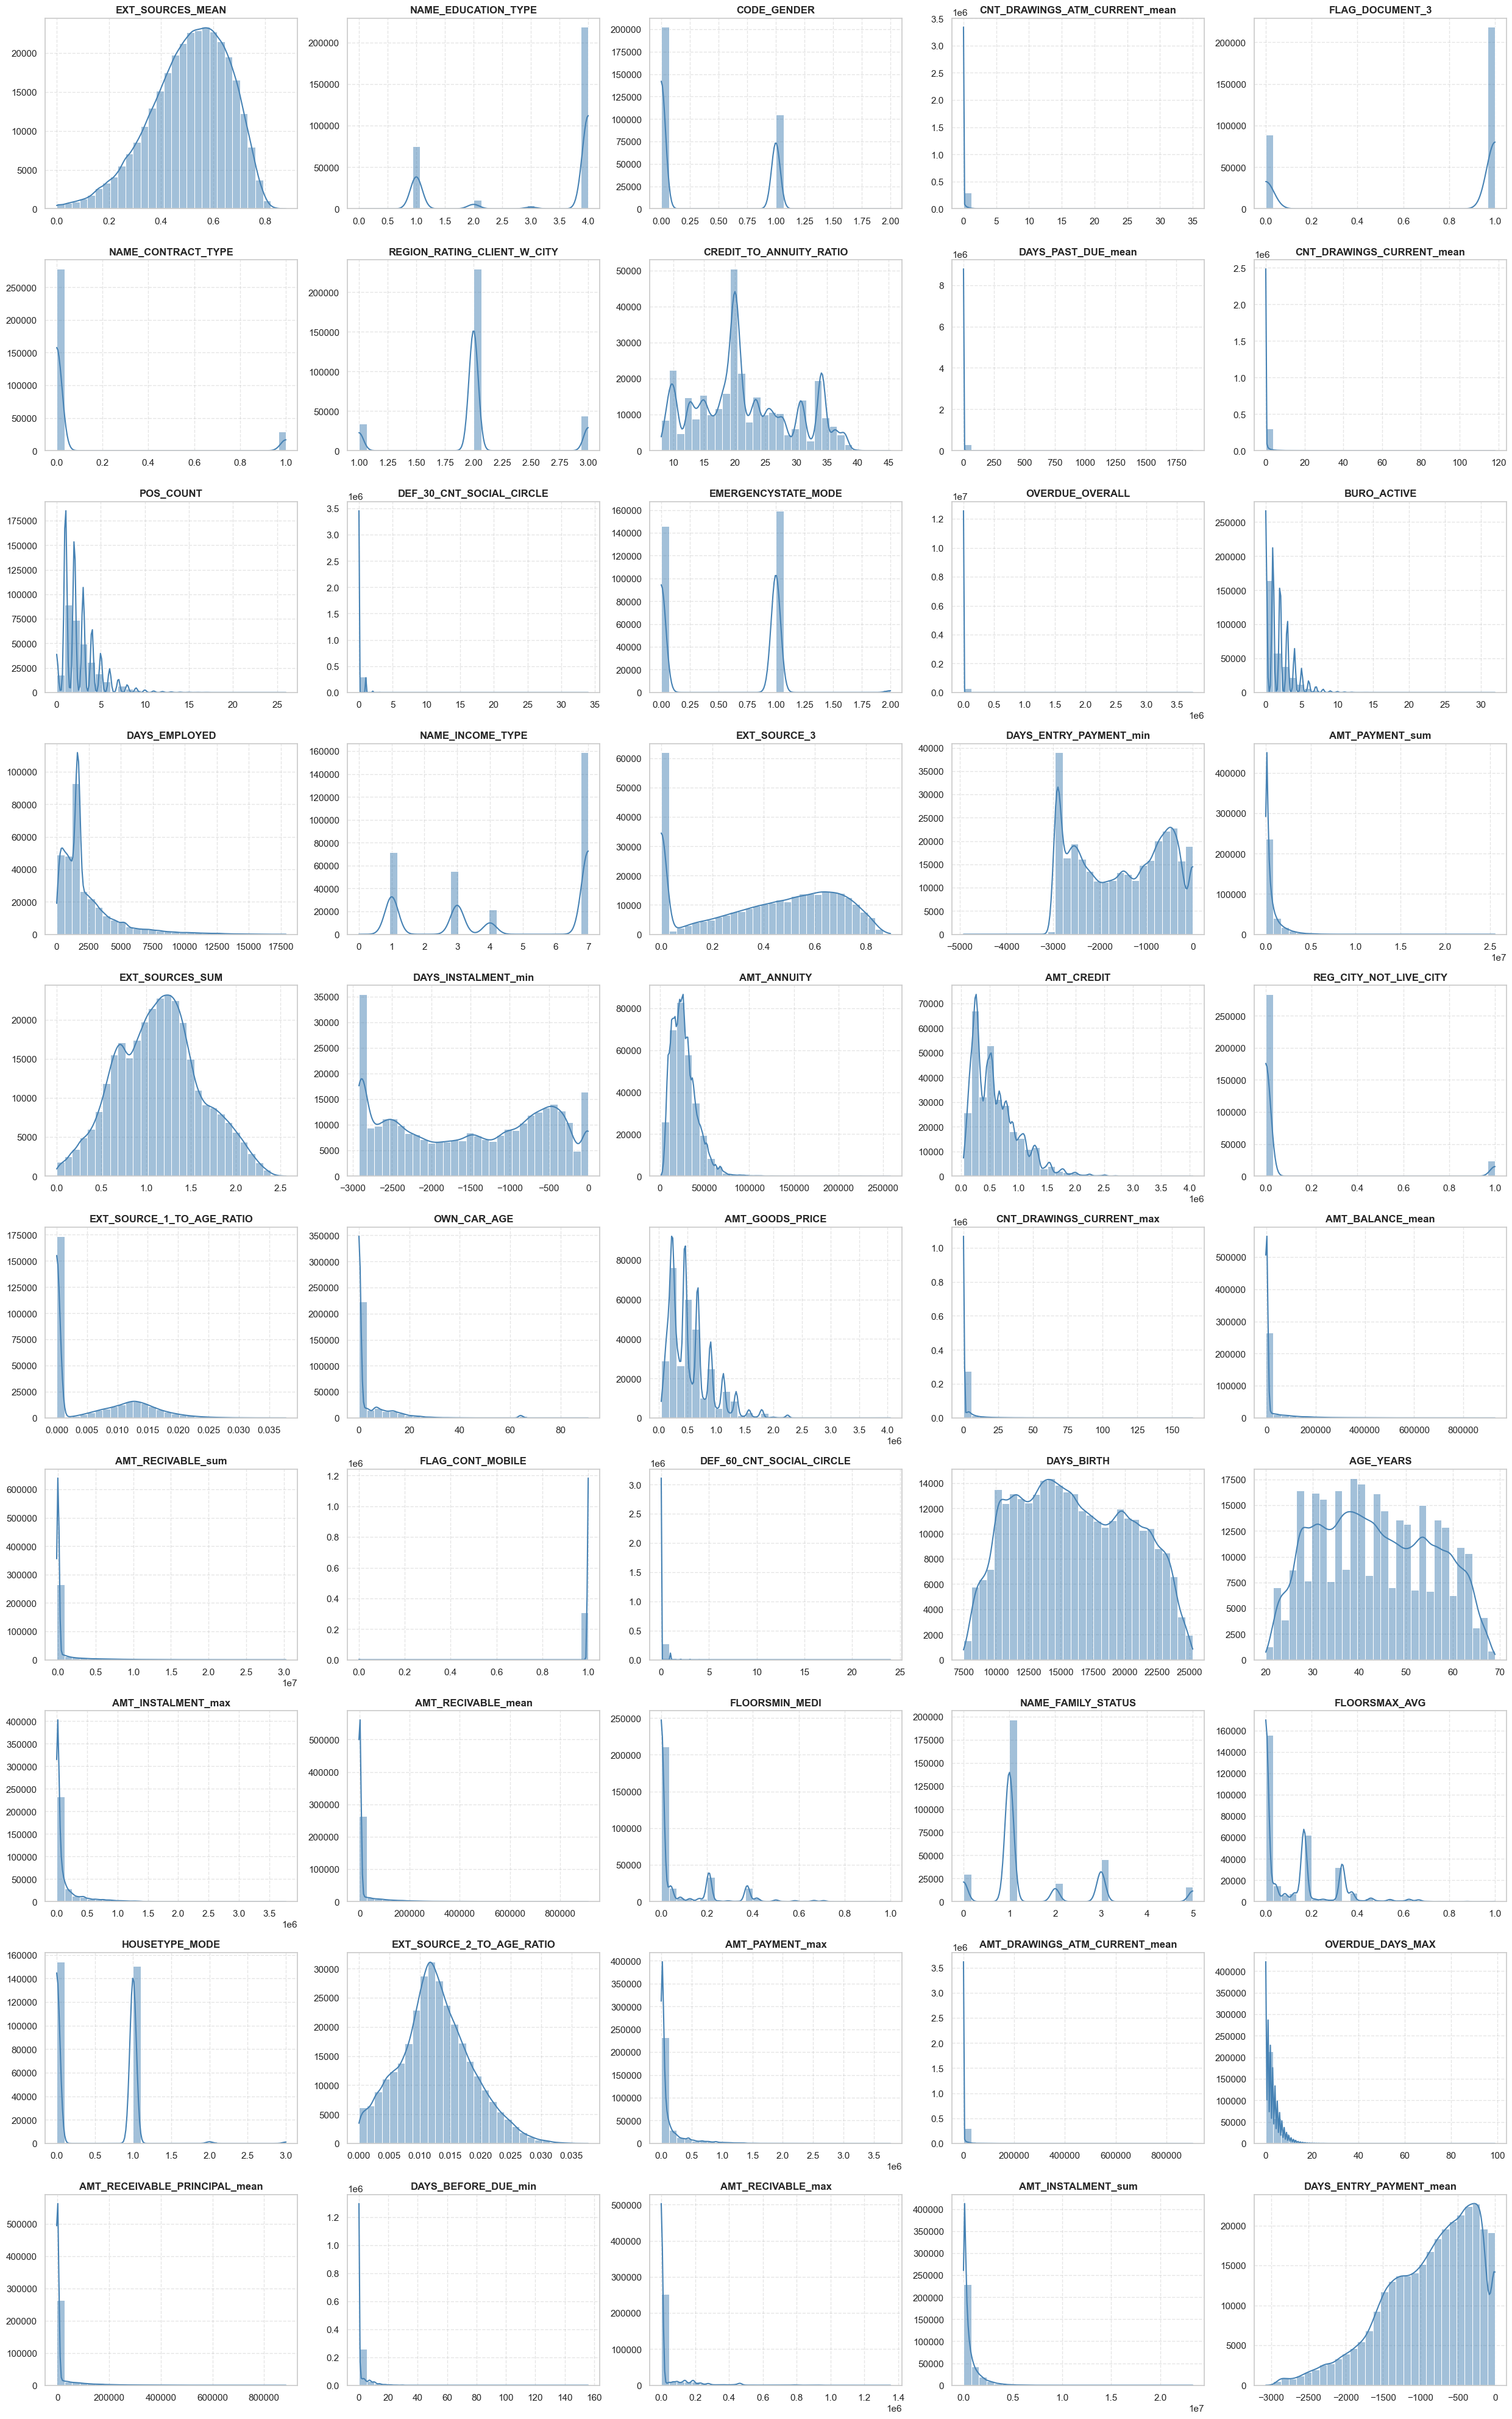

In [136]:
plot_all_distributions(df)

In [148]:
def plot_defaulter_distribution_grid(df, categorical_cols, target_col='TARGET', cols_per_row=3):
    total_plots = len(categorical_cols)
    rows = (total_plots + cols_per_row - 1) // cols_per_row  # Ceiling division

    plt.figure(figsize=(cols_per_row * 5, rows * 4))  # Adjust size based on grid

    for i, column in enumerate(categorical_cols, 1):
        plt.subplot(rows, cols_per_row, i)
        sns.countplot(
            data=df,
            x=column,
            hue=target_col,
            palette={0: '#2E8B57', 1: '#FF6347'}
        )
        plt.title(f'{column}', fontsize=11, weight='bold')
        plt.xlabel('')
        plt.ylabel('')
        plt.xticks(rotation=45, ha='right')
        plt.legend(title='TARGET', labels=['Non-Default', 'Default'], loc='upper right', fontsize=8)
        plt.grid(True, linestyle='--', alpha=0.5)

    plt.tight_layout()
    plt.savefig("Merged_Categorical_bin_Distributions.png", dpi=300)
    plt.show()
    plt.close()

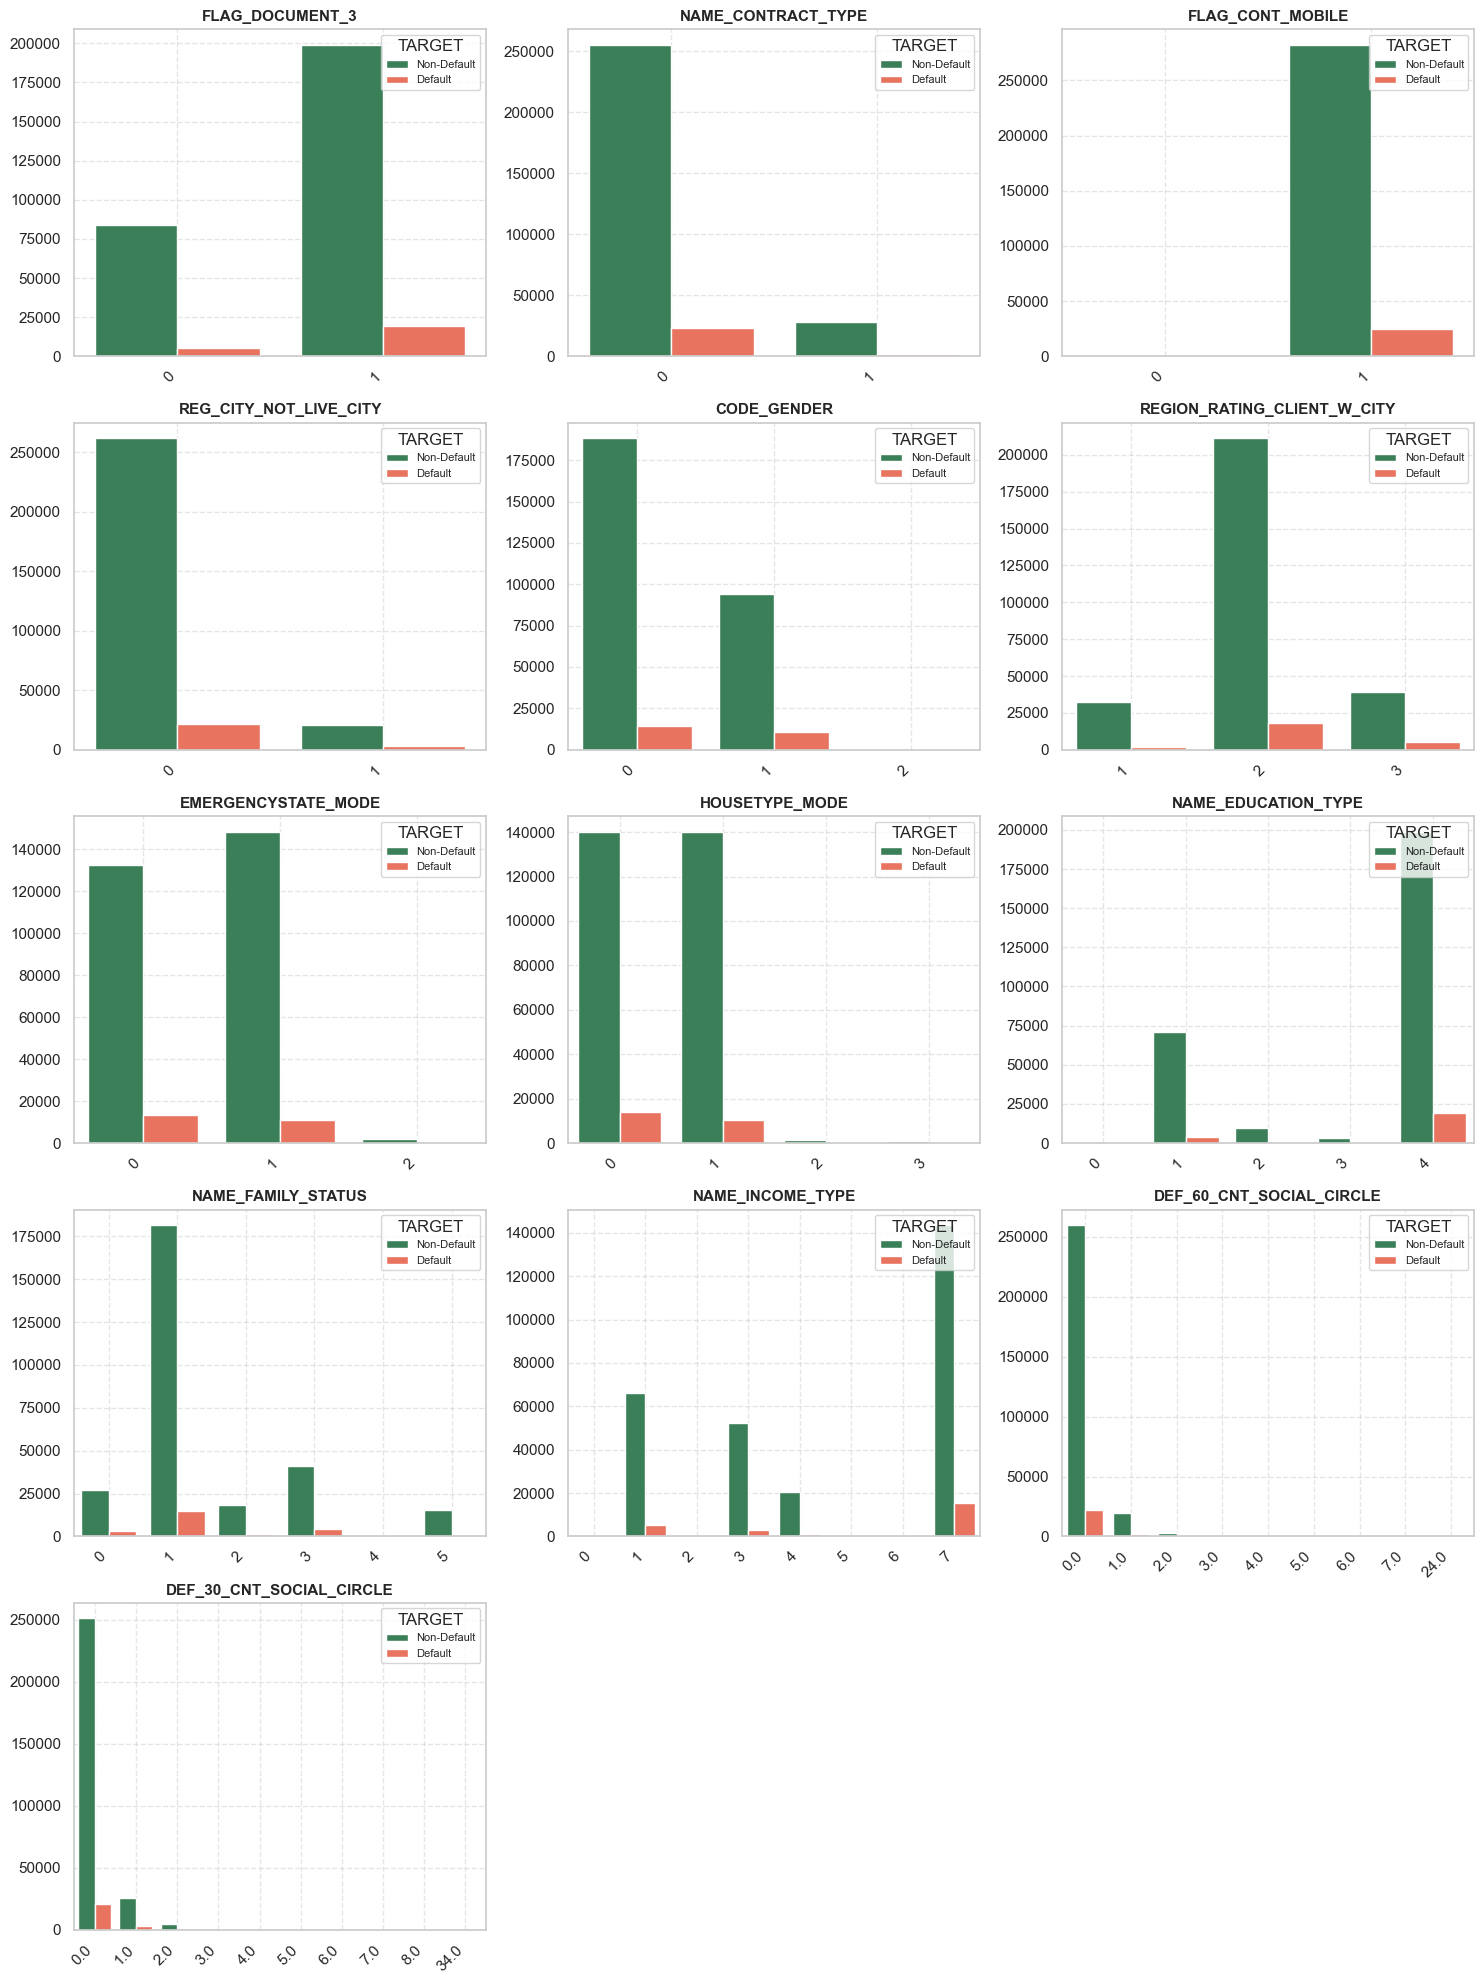

In [146]:
# List of categorical columns
categorical_cols = [
    'FLAG_DOCUMENT_3', 'NAME_CONTRACT_TYPE', 'FLAG_CONT_MOBILE',
    'REG_CITY_NOT_LIVE_CITY', 'CODE_GENDER', 'REGION_RATING_CLIENT_W_CITY',
    'EMERGENCYSTATE_MODE', 'HOUSETYPE_MODE', 'NAME_EDUCATION_TYPE',
    'NAME_FAMILY_STATUS', 'NAME_INCOME_TYPE', 'DEF_60_CNT_SOCIAL_CIRCLE',
    'DEF_30_CNT_SOCIAL_CIRCLE'
]

# Call the function
plot_defaulter_distribution_grid(df, categorical_cols)

In [106]:
df1 = [
    'DEF_30_CNT_SOCIAL_CIRCLE', 'BURO_ACTIVE', 'POS_COUNT',
    'DAYS_BEFORE_DUE_min', 'FLOORSMIN_MEDI', 'AGE_YEARS',
    'OVERDUE_DAYS_MAX', 'OWN_CAR_AGE', 'CNT_DRAWINGS_CURRENT_max'
]

for col in df1:
    unique_vals = sorted(df[col].dropna().unique())  # Drop NaNs and sort
    print(f"{col}: {len(unique_vals)} unique values")
    print(unique_vals)
    print("-" * 60)


DEF_30_CNT_SOCIAL_CIRCLE: 10 unique values
[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 34.0]
------------------------------------------------------------
BURO_ACTIVE: 23 unique values
[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 22.0, 32.0]
------------------------------------------------------------
POS_COUNT: 26 unique values
[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 26.0]
------------------------------------------------------------
DAYS_BEFORE_DUE_min: 43 unique values
[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 33.0, 36.0, 38.0, 43.0, 45.0, 47.0, 60.0, 75.0, 90.0, 99.0, 101.0, 156.0]
------------------------------------------------------------
FLOORSMIN_MEDI: 47 unique values
[0.0,

In [108]:
df1 = [
    'DEF_30_CNT_SOCIAL_CIRCLE', 'BURO_ACTIVE', 'POS_COUNT',
    'DAYS_BEFORE_DUE_min', 'AGE_YEARS',
    'OVERDUE_DAYS_MAX', 'OWN_CAR_AGE', 'CNT_DRAWINGS_CURRENT_max'
]

# Create bins for each column using qcut
for col in df1:
    try:
        df[col + '_BIN'] = pd.qcut(df[col], q=5, duplicates='drop')
        print(f"Binned {col} into {df[col + '_BIN'].nunique()} quantile bins.")
    except Exception as e:
        print(f"Could not bin {col}: {e}")

C:\Users\tarun\AppData\Local\Temp\ipykernel_20916\387643457.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col + '_BIN'] = pd.qcut(df[col], q=5, duplicates='drop')
C:\Users\tarun\AppData\Local\Temp\ipykernel_20916\387643457.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col + '_BIN'] = pd.qcut(df[col], q=5, duplicates='drop')
C:\Users\tarun\AppData\Local\Temp\ipykernel_20916\387643457.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

Binned DEF_30_CNT_SOCIAL_CIRCLE into 1 quantile bins.
Binned BURO_ACTIVE into 4 quantile bins.
Binned POS_COUNT into 5 quantile bins.
Binned DAYS_BEFORE_DUE_min into 2 quantile bins.
Binned AGE_YEARS into 5 quantile bins.
Binned OVERDUE_DAYS_MAX into 4 quantile bins.
Binned OWN_CAR_AGE into 2 quantile bins.
Binned CNT_DRAWINGS_CURRENT_max into 1 quantile bins.


C:\Users\tarun\AppData\Local\Temp\ipykernel_20916\387643457.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col + '_BIN'] = pd.qcut(df[col], q=5, duplicates='drop')


In [110]:
df[[col for col in df.columns if col.endswith('_BIN')]].head()

,DEF_30_CNT_SOCIAL_CIRCLE_BIN,BURO_ACTIVE_BIN,POS_COUNT_BIN,DAYS_BEFORE_DUE_min_BIN,AGE_YEARS_BIN,OVERDUE_DAYS_MAX_BIN,OWN_CAR_AGE_BIN,CNT_DRAWINGS_CURRENT_max_BIN
0,"(-0.001, 34.0]","(1.0, 2.0]","(-0.001, 1.0]","(3.0, 156.0]","(19.999, 32.0]","(1.0, 3.0]","(-0.001, 8.0]","(-0.001, 165.0]"
1,"(-0.001, 34.0]","(-0.001, 1.0]","(2.0, 3.0]","(-0.001, 3.0]","(39.0, 47.0]","(1.0, 3.0]","(-0.001, 8.0]","(-0.001, 165.0]"
2,"(-0.001, 34.0]","(-0.001, 1.0]","(-0.001, 1.0]","(-0.001, 3.0]","(47.0, 56.0]","(1.0, 3.0]","(8.0, 91.0]","(-0.001, 165.0]"
3,"(-0.001, 34.0]","(-0.001, 1.0]","(2.0, 3.0]","(-0.001, 3.0]","(47.0, 56.0]","(-0.001, 1.0]","(-0.001, 8.0]","(-0.001, 165.0]"
4,"(-0.001, 34.0]","(-0.001, 1.0]","(4.0, 26.0]","(-0.001, 3.0]","(47.0, 56.0]","(-0.001, 1.0]","(-0.001, 8.0]","(-0.001, 165.0]"


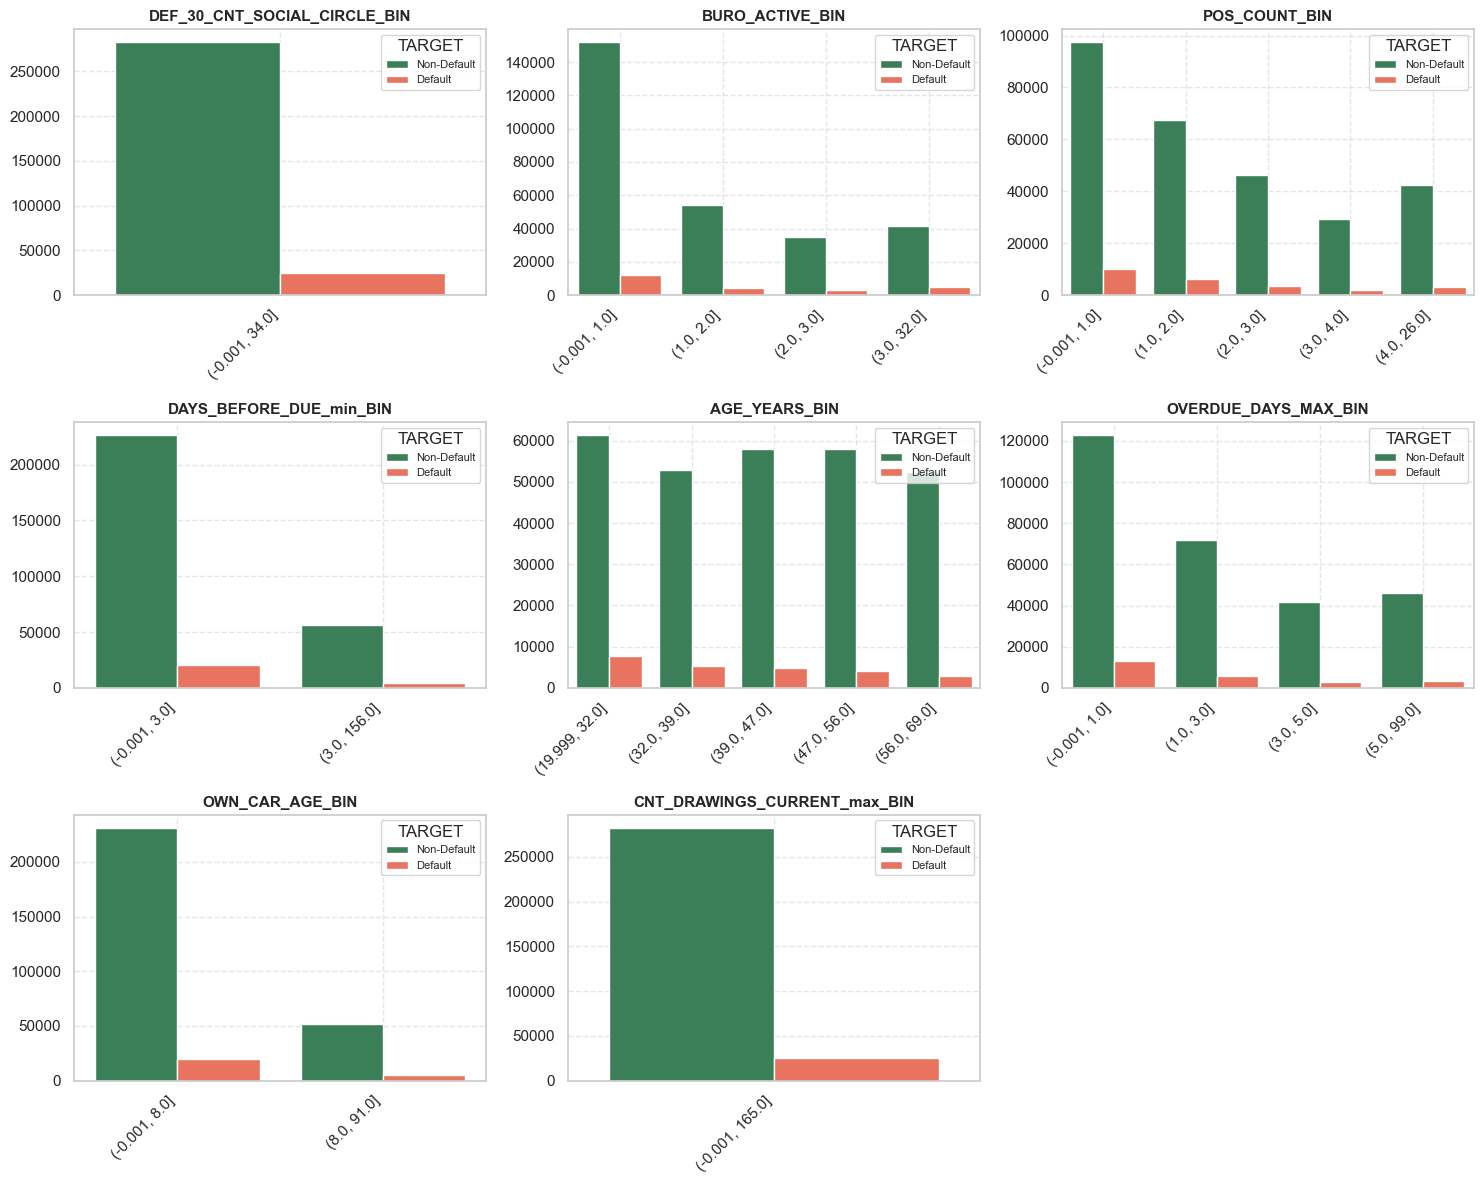

In [150]:
categorical_cols = [
    'DEF_30_CNT_SOCIAL_CIRCLE_BIN', 'BURO_ACTIVE_BIN', 'POS_COUNT_BIN',
    'DAYS_BEFORE_DUE_min_BIN', 'AGE_YEARS_BIN', 'OVERDUE_DAYS_MAX_BIN',
    'OWN_CAR_AGE_BIN', 'CNT_DRAWINGS_CURRENT_max_BIN'
]

# Call the function
plot_defaulter_distribution_grid(df, categorical_cols)

In [158]:
# Load main dataset
app_train = pd.read_csv('application_train_final_Without_Null_value.csv')
app_train.head(5)

df = app_train[
    [
        'EXT_SOURCES_MEAN',
        'NAME_EDUCATION_TYPE',
        'CODE_GENDER',
        'CNT_DRAWINGS_ATM_CURRENT_mean',
        'FLAG_DOCUMENT_3',
        'NAME_CONTRACT_TYPE',
        'REGION_RATING_CLIENT_W_CITY',
        'CREDIT_TO_ANNUITY_RATIO',
        'DAYS_PAST_DUE_mean',
        'CNT_DRAWINGS_CURRENT_mean',
        'POS_COUNT',
        'DEF_30_CNT_SOCIAL_CIRCLE',
        'EMERGENCYSTATE_MODE',
        'OVERDUE_OVERALL',
        'BURO_ACTIVE',
        'DAYS_EMPLOYED',
        'NAME_INCOME_TYPE',
        'EXT_SOURCE_3',
        'DAYS_ENTRY_PAYMENT_min',
        'AMT_PAYMENT_sum',
        'EXT_SOURCES_SUM',
        'DAYS_INSTALMENT_min',
        'AMT_ANNUITY',
        'AMT_CREDIT',
        'REG_CITY_NOT_LIVE_CITY',
        'EXT_SOURCE_1_TO_AGE_RATIO',
        'OWN_CAR_AGE',
        'AMT_GOODS_PRICE',
        'CNT_DRAWINGS_CURRENT_max',
        'AMT_BALANCE_mean',
        'AMT_RECIVABLE_sum',
        'FLAG_CONT_MOBILE',
        'DEF_60_CNT_SOCIAL_CIRCLE',
        'DAYS_BIRTH',
        'AGE_YEARS',
        'AMT_INSTALMENT_max',
        'AMT_RECIVABLE_mean',
        'FLOORSMIN_MEDI',
        'NAME_FAMILY_STATUS',
        'FLOORSMAX_AVG',
        'HOUSETYPE_MODE',
        'EXT_SOURCE_2_TO_AGE_RATIO',
        'AMT_PAYMENT_max',
        'AMT_DRAWINGS_ATM_CURRENT_mean',
        'OVERDUE_DAYS_MAX',
        'AMT_RECEIVABLE_PRINCIPAL_mean',
        'DAYS_BEFORE_DUE_min',
        'AMT_RECIVABLE_max',
        'AMT_INSTALMENT_sum',
        'DAYS_ENTRY_PAYMENT_mean',
        'TARGET'
    ]
]

df.head(5)

,EXT_SOURCES_MEAN,NAME_EDUCATION_TYPE,CODE_GENDER,CNT_DRAWINGS_ATM_CURRENT_mean,FLAG_DOCUMENT_3,NAME_CONTRACT_TYPE,REGION_RATING_CLIENT_W_CITY,CREDIT_TO_ANNUITY_RATIO,DAYS_PAST_DUE_mean,CNT_DRAWINGS_CURRENT_mean,...,EXT_SOURCE_2_TO_AGE_RATIO,AMT_PAYMENT_max,AMT_DRAWINGS_ATM_CURRENT_mean,OVERDUE_DAYS_MAX,AMT_RECEIVABLE_PRINCIPAL_mean,DAYS_BEFORE_DUE_min,AMT_RECIVABLE_max,AMT_INSTALMENT_sum,DAYS_ENTRY_PAYMENT_mean,TARGET
0,0.161787,4,1,0.0,1,0,2,16.461104,0.000000,0.0,...,0.010518,53093.745,0.0,3.0,0.0,12.0,0.0,219625.695,-315.421053,1
1,0.466757,1,0,0.0,1,0,1,36.234085,0.000000,0.0,...,0.013828,560835.360,0.0,3.0,0.0,1.0,0.0,1618864.650,-1385.320000,0
2,0.642739,4,1,0.0,0,1,2,20.000000,0.000000,0.0,...,0.010691,10573.965,0.0,2.0,0.0,3.0,0.0,21288.465,-761.666667,0
3,0.650442,4,0,0.0,1,0,2,10.532818,0.000000,0.0,...,0.012508,691786.890,0.0,0.0,0.0,1.0,0.0,1007153.415,-271.625000,0
4,0.322738,4,1,0.0,0,0,2,23.461618,0.954545,0.0,...,0.005977,22678.785,0.0,1.0,0.0,0.0,0.0,835985.340,-1032.242424,0


C:\Users\tarun\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


📊 Logistic Regression Performance Metrics
ROC-AUC Score: 0.6320
Precision:     0.0000
Recall:        0.0000
F1-Score:      0.0000
Accuracy:      0.9191


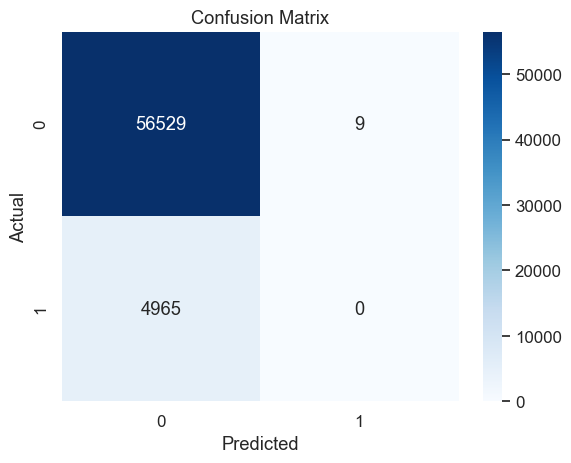

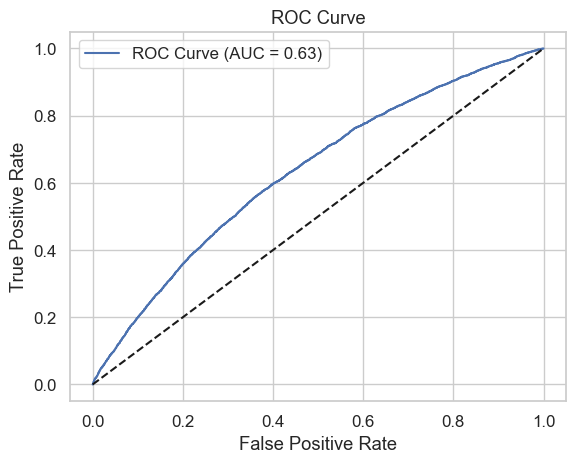

In [164]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    roc_auc_score, precision_score, recall_score,
    f1_score, accuracy_score, confusion_matrix, roc_curve
)
import seaborn as sns
import matplotlib.pyplot as plt


# ✅ Step 1: Define features and target
X = df.drop(columns='TARGET')  # Replace 'target' with your actual target column name
y = df['TARGET']

# ✅ Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ✅ Step 3: Train logistic regression
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# ✅ Step 4: Predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# ✅ Step 5: Evaluation metrics
roc_auc = roc_auc_score(y_test, y_pred_proba)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# ✅ Step 6: Print results
print("📊 Logistic Regression Performance Metrics")
print(f"ROC-AUC Score: {roc_auc:.4f}")
print(f"Precision:     {precision:.4f}")
print(f"Recall:        {recall:.4f}")
print(f"F1-Score:      {f1:.4f}")
print(f"Accuracy:      {accuracy:.4f}")

# ✅ Step 7: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig("Confusion.png", dpi=300)
plt.show()

# ✅ Step 8: ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.savefig("ROC Curve.png", dpi=300)
plt.show()


In [ ]:
Logistic Regression Performance Metrics
ROC-AUC Score: 0.6320
Precision:     0.0000
Recall:        0.0000
F1-Score:      0.0000
Accuracy:      0.9191
